In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv("drug200.csv")


In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.shape


(200, 6)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [8]:
df.isnull().sum()/len(df.isnull().sum())*100

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

<Axes: xlabel='Cholesterol', ylabel='count'>

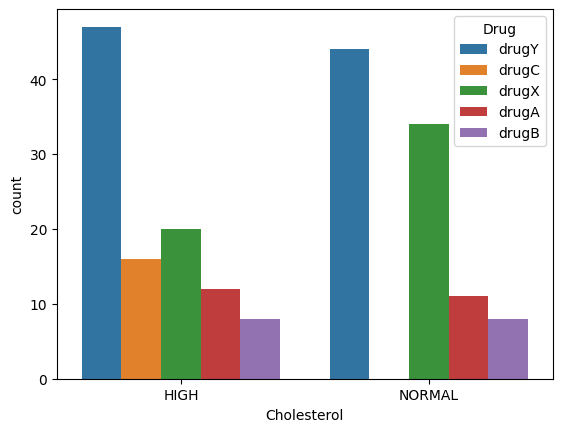

In [9]:
sns.countplot(data=df,x="Cholesterol",hue="Drug")

<Axes: xlabel='BP', ylabel='count'>

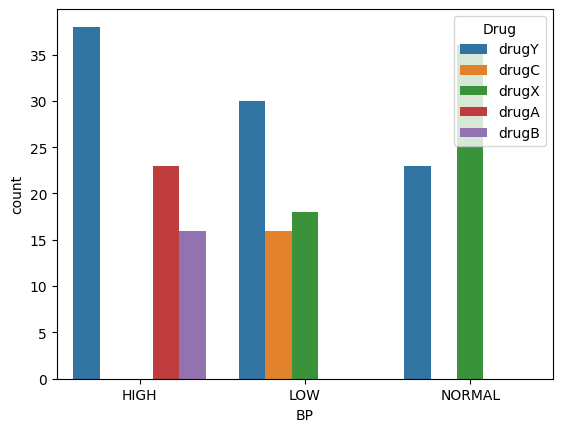

In [10]:
sns.countplot(data=df,x="BP",hue="Drug")

In [11]:
lb = LabelEncoder()
df["Cholesterol_lb"]=lb.fit_transform(df["Cholesterol"])
df["Sex_lb"]=lb.fit_transform(df["Sex"])
df["BP_lb"]=lb.fit_transform(df["BP"])

In [12]:
df.drop(columns=["Cholesterol","Sex","BP"],axis=1,inplace=True)

In [13]:
df.head()

,Age,Na_to_K,Drug,Cholesterol_lb,Sex_lb,BP_lb
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,0,1,1
2,47,10.114,drugC,0,1,1
3,28,7.798,drugX,0,0,2
4,61,18.043,drugY,0,0,1


In [14]:
X=X=df[["Age","Sex_lb","BP_lb","Cholesterol_lb","Na_to_K"]]

In [15]:
Y=df["Drug"]

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
cl=DecisionTreeClassifier()
cl.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
y_pred=cl.predict(X_test)

In [19]:
sc=accuracy_score(y_pred,Y_test)

In [20]:
print("The accuracy score is: ",sc)

The accuracy score is:  1.0


In [21]:
from sklearn.tree import plot_tree

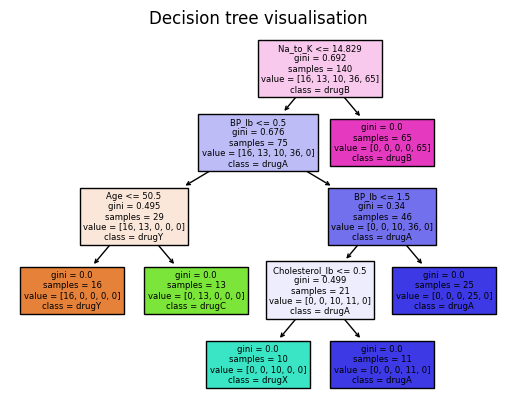

In [22]:
plot_tree(cl,feature_names=X.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()